In [20]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

y = train_data.label
X = train_data.drop('label', axis=1)
X = tf.constant(X).astype(tf.uint8).reshape(-1, 28, 28, 1)
X_test = tf.constant(test_data).astype(tf.uint8).reshape(-1, 28, 28, 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

model = tf.keras.Sequential([
    BatchNormalization(input_shape=[28, 28, 1]),
    Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),

    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),

    BatchNormalization(),
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),

    BatchNormalization(),
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),

    BatchNormalization(),
    Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),

    Flatten(),
    Dense(20, activation='relu'),
    Dropout(rate=0.3),
    Dense(10),
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

fit_object = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=31500,
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 2.7926 - accuracy: 0.0854 - val_loss: 3.0698 - val_accuracy: 0.0985
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 2.1134 - accuracy: 0.2288 - val_loss: 2.9647 - val_accuracy: 0.1102
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 1.9434 - accuracy: 0.2656 - val_loss: 3.3512 - val_accuracy: 0.0985
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 2.0178 - accuracy: 0.3217 - val_loss: 3.1798 - val_accuracy: 0.1227
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 1.6347 - accuracy: 0.4122 - val_loss: 3.0249 - val_accuracy: 0.1228
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 1.4842 - accuracy: 0.4439 - val_loss: 2.8738 - val_accuracy: 0.1704
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 1.2890 - accuracy: 0.4973 - val_loss: 2.7886 - val_accuracy: 0.1631
Epoch 8/100
1/1 [=================

<Axes: >

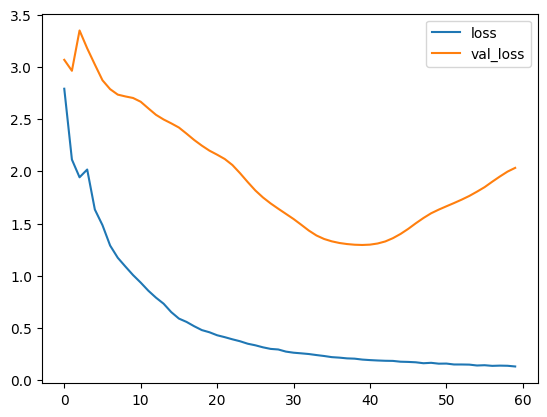

In [16]:
history_df = pd.DataFrame(fit_object.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [23]:
yhat_test = np.argmax(model.predict(X_test), axis=1)

output_df = pd.DataFrame({
    'ImageId': range(1, len(test_data)+1),
    'Label': yhat_test,
})

output_df.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_1.csv', index=False)

875/875 [==============================] - 4s 5ms/step
